# 1.基于NumPy实现 k 均值聚类算法

In [1]:
import numpy as np

#### 1.两个向量 x 和 y 之间的欧式距离计算函数

In [2]:
def euclidean_distance(x , y):
    """
    输入：
    x:向量x
    y:向量y
    输出：
    np.sqrt(distance):欧氏距离
    """
    # 初始化距离
    distance = 0
    # 遍历并对距离的平方进行累加
    for i in range(len(x)):
        distance += pow((x[i] - y[i]) , 2)
        
    return np.sqrt(distance)

#### 2.簇中心点初始化函数

In [3]:
def centroids_init(X , k):
    """
    输入：
    X：训练样本，NumPy数组
    k：簇中心点个数，也是聚类个数
    输出：
    centroids：簇中心点矩阵
    """
    # 样本数和特征数
    m , n = X.shape
    # 初始化簇中心点矩阵，大小为簇中心点个数×特征数
    centroids = np.zeros((k , n))
    # 遍历
    for i in range(k):
        # 每一次循环随机选择一个数据点作为初始簇中心点
        centroid = X[np.random.choice(range(m))]
        # 将初始簇中心点向量分配给簇中心点矩阵
        centroids[i] = centroid
        
    return centroids

#### 3.根据质心和距离判断所属簇中心点索引

In [4]:
def closeest_centroid(x , centroids):
    """
    输入：
    x：单个样本实例
    centroids：质心矩阵
    输出：
    closest_i：样本所属簇中心点索引
    """
    # 初始化最近簇索引和最近距离
    closeest_i , closeest_dist = 0 , float('inf') # inf 正无穷
    # 遍历簇中心点
    for i,centroid in enumerate(centroids):
        # 计算欧式距离
        distance = euclidean_distance(x , centroid)
        # 根据欧式距离判断并选择最近质心的索引
        if distance < closeest_dist:
            closeest_i = i
            closeest_dist = distance
            
    return closeest_i

#### 4.为每个样本分配簇

In [5]:
def build_clusters(centroids , k , X):
    """
    输入：
    centroids：质心矩阵
    k：簇中心点个数，也是聚类个数
    X：训练样本，NumPy数组
    输出：
    clusters：聚类簇
    """
    # 初始化簇列表
    clusters = [[] for _ in range(k)]
    # 遍历训练样本
    for x_i ,x in enumerate(X):
        # 获取样本所属最近簇中心点的索引
        centroid_i = closeest_centroid(x , centroids)
        # 将当前样本添加到所属类簇中
        clusters[centroid_i].append(x_i)
        
    return clusters

#### 5. 重新计算质心

In [6]:
def calculate_centroids(clusters , k , X):
    """
    输入：
    clusters：上一步的聚类簇
    k：簇中心点个数，也是聚类个数
    X：训练样本，NumPy数组
    输出：
    centroids：更新后的质心矩阵
    """
    # 特征数
    n = X.shape[1]
    # 初始化簇中心点矩阵，大小为簇中心点个数×特征数
    centroids = np.zeros((k,n))
    # 遍历当前簇
    for i,cluster in enumerate(clusters):
        # 计算每个簇的均值作为新的簇中心点
        centroid = np.mean(X[cluster] , axis=0)
        # 将簇中心点向量分配给簇中心点矩阵
        centroids[i] = centroid
        
    return centroids

#### 6.获取样本所属的聚类类别

In [7]:
def get_cluster_labels(clusters , X):
    """
    输入：
    clusters：当前的聚类簇
    X：训练样本，NumPy数组
    输出：
    y_pred：预测类别
    """
    y_pred = np.zeros(X.shape[0])
    
    for cluster_i , cluster in enumerate(clusters):
        for sample_i in cluster:
            y_pred[sample_i] = cluster_i
            
    return y_pred

#### 7.将上述各组件进行封装，定义一个完整的k 均值聚类算法流程

In [8]:
def kmeans(X,k,max_iterations):
    """
    输入：
    X：训练样本，NumPy数组
    k：簇中心点个数，也是聚类个数
    max_iterations：最大迭代次数
    输出：
    预测类别列表
    """
    # 1.初始化簇中心点
    centroids = centroids_init(X, k)
    # 遍历迭代求解
    for _ in range(max_iterations):
        # 2.根据当前簇中心点进行聚类
        clusters = build_clusters(centroids, k, X)
        # 保存当前簇中心点
        cur_centroids = centroids
        # 3.根据聚类结果计算新的簇中心点
        centroids = calculate_centroids(clusters, k, X)
        # 4.设定收敛条件为簇中心点是否发生变化
        diff = centroids - cur_centroids
        if not diff.any():
            break
    # 返回最终的聚类标签
    return get_cluster_labels(clusters, X)

#### 8.测试

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# 创建测试数据
X = np.array([[0,2],[0,0],[1,0],[5,0],[5,2]])
X

array([[0, 2],
       [0, 0],
       [1, 0],
       [5, 0],
       [5, 2]])

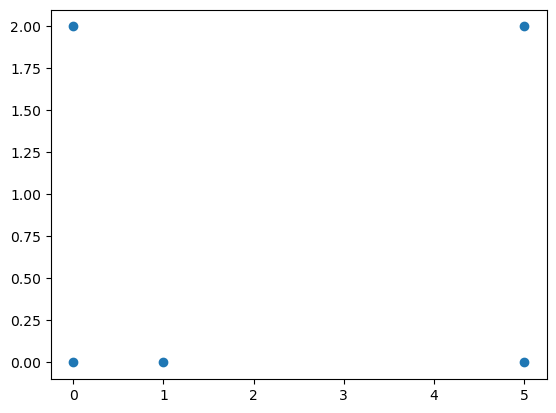

In [11]:
plt.scatter(X.T[0] , X.T[1])

In [12]:
# 设定聚类类别为2个，最大迭代次数为10
labels = kmeans(X, 2, 10)
# 打印每个样本所属的类别标签
print(labels)

[0. 0. 0. 1. 1.]


# 2.基于sklearn实现 k 均值聚类算法

In [13]:
# 消除内存泄露警告
# UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [14]:
# 导入KMeans模块
from sklearn.cluster import KMeans

In [15]:
# 创建测试数据
X = np.array([[0,2],[0,0],[1,0],[5,0],[5,2]])

In [16]:
# 创建k均值聚类实例并进行数据拟合
kmeans = KMeans(n_clusters=2 , random_state=0).fit(X)

In [17]:
# 打印拟合标签
print(kmeans.labels_)

[1 1 1 0 0]
